In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class RGBToGray(layers.Layer):
    """
    Capa en Keras que convierte imágenes (RGB) a escala de grises usando
    coeficientes de luminancia (por defecto BT.601: 0.299, 0.587, 0.114).

    - Input:  Tensor (B, H, W, 3) Batch, Height, Weight, 3 channels (RGB)
    - Output: Tensor (B, H, W, 1) Batch, Height, Weight, 1 chaanel
    """

    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        # Coeficientes de luminancia. Constantes
        # Los almacenamos como tf.constant para usarlos en el forward
        self.luma = tf.constant([0.299, 0.587, 0.114], dtype=tf.float32)


    def call(self, inputs):
        """
        Forward de la capa. Aplica una combinación lineal de canales RGB con los
        coeficientes de luminancia.
        """
        # Convertimos a float32 por seguridad.
        x = tf.cast(inputs, tf.float32)

        # Reducción sobre el eje de canales (último eje). Equivalente a:
        # y = R*wr + G*wg + B*wb
        # tf.tensordot con axes=[[-1],[0]] "colapsa" el canal 3 → (B, H, W)
        y = tf.tensordot(x, self.luma, axes=[[-1], [0]])

        # Reintroducimos el eje de canal como 1: (B, H, W, 1)
        y = tf.expand_dims(y, axis=-1)

        return y

    def get_config(self):
        """
        Serialización de la capa
        """
        return super().get_config()

Shape original: (5, 32, 32, 3) uint8
Shape gris: (5, 32, 32, 1) float32


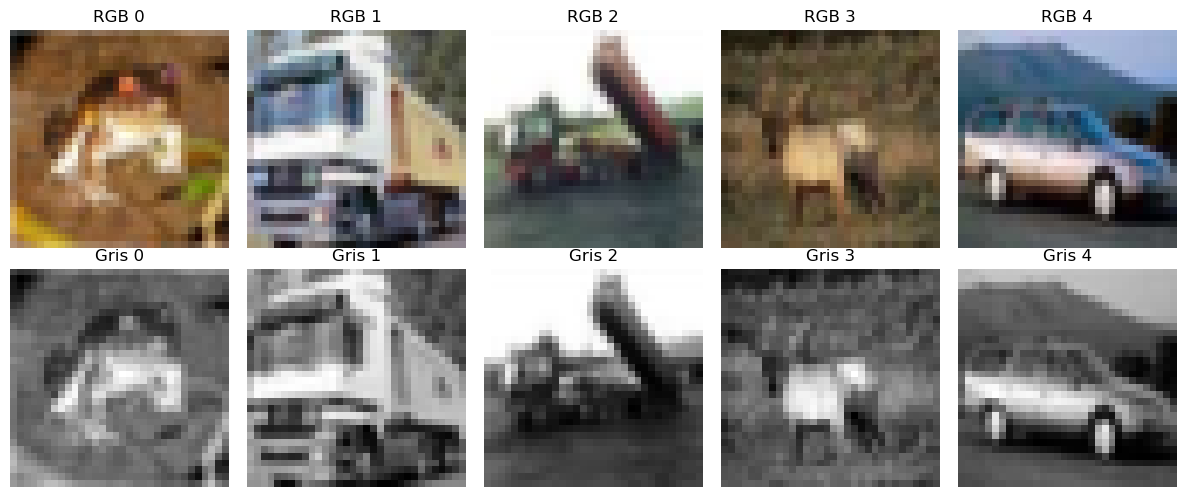

In [4]:
# Cargar CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Cargar las 5 primeras imagenes de train
x_sample = x_train[:5]  # shape (5, 32, 32, 3)

# Instanciamos la capa
gray_layer = RGBToGray()

# Aplicamos la capa para obtener escala de grises
# La capa castea a float32 y devuelve (B, H, W, 1)
x_gray = gray_layer(x_sample)  # Tensor float32
x_gray = x_gray.numpy()

print("Shape original:", x_sample.shape, x_sample.dtype)
print("Shape gris:", x_gray.shape, x_gray.dtype)

# Normalizamos a [0,1] solo para mostrar con matplotlib de forma consistente
x_sample_disp = (x_sample.astype("float32") / 255.0)          # (5,32,32,3), float32 [0,1]
x_gray_disp   = (x_gray[..., 0].astype("float32") / 255.0)    # (5,32,32),   float32 [0,1]

# Visualizar
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i in range(5):
    axes[0, i].imshow(x_sample_disp[i])
    axes[0, i].set_title(f"RGB {i}")
    axes[0, i].axis("off")

    axes[1, i].imshow(x_gray_disp[i], cmap="gray")
    axes[1, i].set_title(f"Gris {i}")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()